In [21]:
from to_import import *
from audioFunctions import *
from sequenceGenerators import *
from receiver import *

In [35]:
# calculate P(d) 
def getP(y, L = L):
    P = np.zeros(len(y)-L, dtype=complex)
    for m in range(L):
        # calculate P[0]
        P[0] += y[m].conj()*y[m+L] 
    for d in range(len(y)-2*L):
        P[d+1] = P[d] + y[d+L].conj()*y[d+2*L] - y[d].conj()*y[d+L]
    return P


# calculate R(d) 
def getR(y, L = L):
    R = np.zeros(len(y)-L)
    for m in range(L):
        # calculate R[0]
        R[0] += abs(y[m+L])**2 
    for d in range(len(y)-2*L):
        R[d+1] = R[d] + abs(y[d+2*L])**2-abs(y[d+L])**2
    return R

# calculate M(d) 
def getM(y, L = L):
    P = getP(y)
    R = getR(y)
    M = abs(P/R)**2
    return M  

# creates list of possible start indexes
def getStartIndex(y, L = L, K = K):
    M = getM(y)
    if K != 0:
        convolved_M = np.convolve(M, np.ones(K) / K, 'same')
        dM = np.diff(convolved_M)
    else:
        dM = np.diff(M)
    crossed_x_axis = dM[:-1] * dM[1:]
    start_index = np.zeros(len(dM))
    i = 1
    while i < len(dM)-1:
        if crossed_x_axis[i] <= 0 and M[i] > 0.8:
            start_index[i] = 1
            i += L
        i += 1
    return start_index

# Question 1

2895
done
11855380


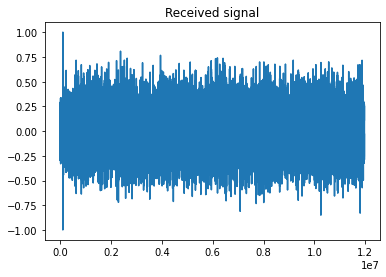

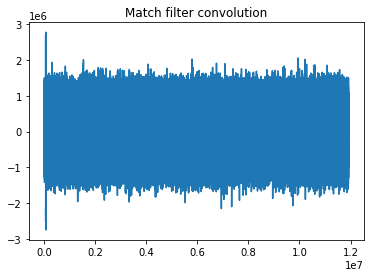

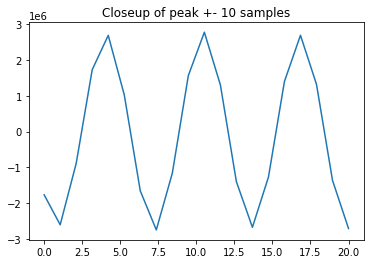

In [23]:
received_signal = audioDataFromFile('a7r56tu_received.wav')
print(len(data))

with open('a7r56tu_knownseq.csv', 'r') as file:
    known_sequence = file.read().replace('\n', '')
known_sequence = [float(x) for x in known_sequence.split()] 

N = 4096
CP = 0
h = Chirp(100, 8000, 1)

sync_data = removeChirpAndPause(received_signal, h, 0)
print('done')
print(len(sync_data))

In [25]:
data = []
for i in range(len(sync_data)//4096 + 1):
    data_block = fft(sync_data[i*4096:(i+1)*4096])
    data.append(data_block)
data = np.asarray(data)
print(data)

[array([-5.8510437-0.j       , -2.2799497+9.340245j ,
       -3.7987897+3.7117577j, ...,  3.0358377+1.0028951j,
       -3.7987897-3.7117577j, -2.2799497-9.340245j ], dtype=complex64)
 array([-8.096649  -0.j       ,  0.33322906+3.6978936j,
        2.2427852 +1.9776815j, ...,  2.5966084 +1.835424j ,
        2.2427852 -1.9776815j,  0.33322906-3.6978936j], dtype=complex64)
 array([ 7.885376  -0.j       ,  4.714965  -0.6128933j,
        1.0481488-11.346745j , ..., -1.7817761 +4.7477508j,
        1.0481488+11.346745j ,  4.714965  +0.6128933j], dtype=complex64)
 ...
 array([ 2.5467224 -0.j        ,  5.0892076 +2.3465269j ,
       -0.04346454-0.37653768j, ...,  0.14142811+3.4941292j ,
       -0.04346454+0.37653768j,  5.0892076 -2.3465269j ], dtype=complex64)
 array([-2.8275452-0.j        , -8.674854 +1.3488736j ,
       -1.5800786-0.48359466j, ..., -4.4208174+0.91717696j,
       -1.5800786+0.48359466j, -8.674854 -1.3488736j ], dtype=complex64)
 array([ 2.0405278 -0.j       ,  0.03990304-4.0055

# Question 2

In [31]:
received_signal = audioDataFromFile('b8v89t_received.wav')
print(len(received_signal))

with open('a7r56tu_knownseq.csv', 'r') as file:
    known_sequence = file.read().replace('\n', '')
known_sequence = [float(x) for x in known_sequence.split()] 

N = 4096
K = 0
L = N//2

6323897


In [36]:
start_index = getStartIndex(received_signal)
print(start_index)

<ipython-input-35-ef0949e1dccd>:26: RuntimeWarning: invalid value encountered in true_divide
  M = abs(P/R)**2


[0. 0. 0. ... 0. 0. 0.]


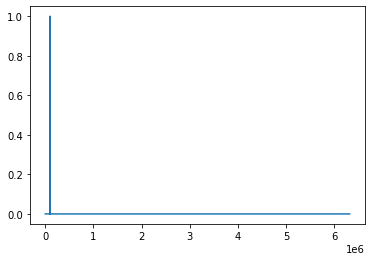

In [37]:
plot_y(start_index)

# Question 3

In [ ]:
received_signal = audioDataFromFile('c9a71v_received.wav')

N = 4096
K = 100
h = Chirp(100, 8000, 1)

sync_data = removeChirpAndPause(received_signal, h, 0)
start_index = getStartIndex(received_signal)
sync_data = sync_data[start_index:]


 chirp -> Schmidl & Cox -> known_data